# RQ8

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

In [4]:
def dateparse(time_as_a_unix_timestamp):
    return pd.to_datetime(time_as_a_unix_timestamp, unit = 's')

In [5]:
df = pd.read_csv('data/steam_reviews.csv', 
                 header = 'infer', 
                 usecols = ['review_id', 
                            'weighted_vote_score', 
                            'language', 
                            'recommended', 
                            'timestamp_created', 
                            'timestamp_updated'],
                 parse_dates = ['timestamp_created', 'timestamp_updated'], 
                 date_parser = dateparse)

In [6]:
reviews_chi = df[(df['language'] == 'schinese') | (df['language'] == 'tchinese')]

reviews_chi['weighted_vote_score'].describe()

count    3.983170e+06
mean     1.459583e-01
std      2.397017e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.761905e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64

In [7]:
reviews_rus = df[df['language'] == 'russian']

reviews_rus['weighted_vote_score'].describe()

count    2.348900e+06
mean     2.135293e-01
std      2.577511e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.051732e-01
max      9.895231e-01
Name: weighted_vote_score, dtype: float64

In [8]:
reviews_chi_nonzero = reviews_chi[reviews_chi['weighted_vote_score'] > 0]

print(reviews_chi_nonzero['weighted_vote_score'].describe())

print(reviews_chi_nonzero['weighted_vote_score'].median())

count    1.100793e+06
mean     5.281437e-01
std      7.782352e-02
min      2.384956e-02
25%      5.003073e-01
50%      5.238096e-01
75%      5.289855e-01
max      9.959868e-01
Name: weighted_vote_score, dtype: float64
0.523809552192688


In [9]:
reviews_rus_nonzero = reviews_rus[reviews_rus['weighted_vote_score'] > 0]

print(reviews_rus_nonzero['weighted_vote_score'].describe())

print(reviews_rus_nonzero['weighted_vote_score'].median())

count    968346.000000
mean          0.517954
std           0.058936
min           0.043478
25%           0.494232
50%           0.521739
75%           0.523810
max           0.989523
Name: weighted_vote_score, dtype: float64
0.52173912525177


(array([4.75195637e+00, 4.00638354e-03, 2.72736969e-02, 8.11764208e-01,
        2.34747229e+00, 9.50724451e-02, 3.85459530e-02, 8.61165946e-03]),
 array([0.        , 0.12369038, 0.24738076, 0.37107114, 0.49476153,
        0.61845191, 0.74214229, 0.86583267, 0.98952305]),
 <a list of 8 Patch objects>)

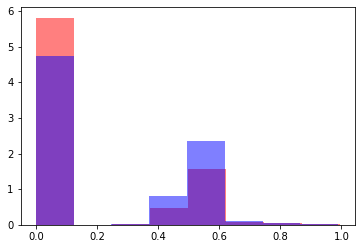

In [10]:
plt.hist(reviews_chi['weighted_vote_score'], bins = 8, color = "red", alpha = 0.5, density = True, stacked = True)
plt.hist(reviews_rus['weighted_vote_score'], bins = 8, color = "blue", alpha = 0.5, density = True, stacked = True)

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


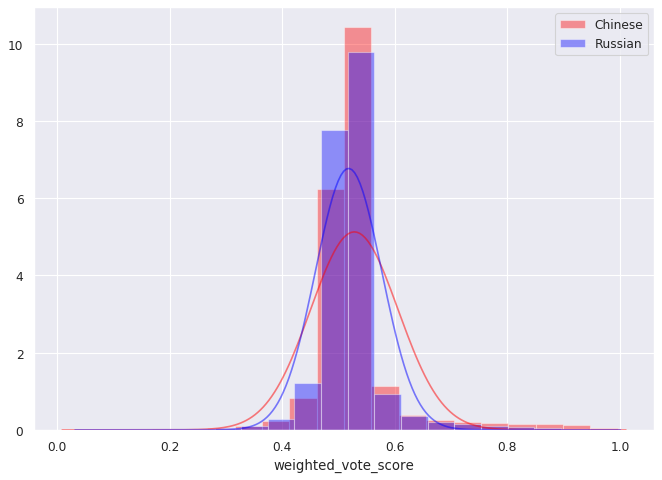

In [11]:
plt.figure(figsize=(10,7), dpi= 80)
sns.set()

sns.distplot(reviews_chi_nonzero['weighted_vote_score'], 
             fit = norm,
             kde = False,
             bins = 20,
             color = "red",
             fit_kws = {"color": "red", "alpha": 0.5},
             label = "Chinese")

sns.distplot(reviews_rus_nonzero['weighted_vote_score'], 
             fit = norm, 
             kde = False,
             bins = 20,
             color = "blue",
             fit_kws = {"color": "blue", "alpha": 0.5},
             label = "Russian")

plt.legend()

In [84]:
df_clean = df[(df['timestamp_updated'].dt.year <= 2021) 
               & (df['timestamp_updated'] != df['timestamp_created'])
               & (df['weighted_vote_score'] > 0)]

In [85]:
delta = pd.to_numeric(df_clean['timestamp_updated'] - df_clean['timestamp_created'])
score = df_clean['weighted_vote_score']

def norm_col(col):
    col_min = col.min()
    col_max = col.max()
    return (col - col_min) / (col_max - col_min)

delta = norm_col(delta)
score = norm_col(score)

In [86]:
np.corrcoef(delta, score)

array([[ 1.        , -0.03504052],
       [-0.03504052,  1.        ]])

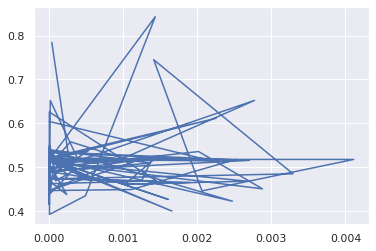

In [87]:
plt.plot(delta[:100], score[:100])

In [88]:
delta.corr(score)

-0.03504052119057236

In [89]:
pearsonr(delta, score)

(-0.03504052119057233, 0.0)

(array([8.67274e+05, 1.87279e+05, 1.02836e+05, 5.06780e+04, 2.04010e+04,
        7.51900e+03, 3.01900e+03, 7.04000e+02, 3.02000e+02, 6.90000e+01]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

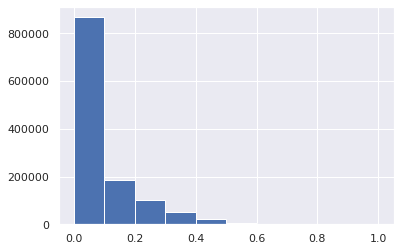

In [90]:
plt.hist(delta)

(array([9.20000e+01, 5.75000e+02, 2.07400e+03, 1.15760e+04, 3.31606e+05,
        4.96608e+05, 4.15980e+04, 2.17900e+04, 1.36220e+04, 4.59900e+03]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

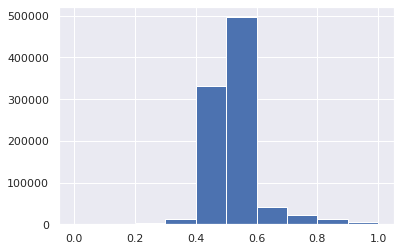

In [83]:
plt.hist(score)